<a href="https://colab.research.google.com/github/jmmfnanotecnologia/Pruebas_curso/blob/main/MiguelMendez_nb05_modulo2_hw_real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# No olvidar que en "google colab" hay que instalar qiskit

########################
# PARA LANZAR EN EL HW DE IBM
# SE REQUIERE LA ÚLTIMA VERSIÓN
########################
# Instalar versión 1.2.2
########################
# Importante, poner qiskit-aer en la misma linea de "pip install" para que coja la versión adecuada
try:
    import google.colab
    print("In colab, let's install things...")
    #
    !pip install qiskit[visualization]==1.2.2 qiskit-aer qiskit-ibm-runtime
except ImportError:
    print("NOT in colab")

In colab, let's install things...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 k

In [ ]:
import qiskit
from qiskit_aer import AerSimulator
print('Qiskit version', qiskit.__version__)
import numpy
import scipy
print("Numpy version", numpy.__version__)
print("Scipy version", scipy.__version__)

Qiskit version 1.2.2
Numpy version 1.26.4
Scipy version 1.13.1


In [ ]:
from IPython.display import display, Latex, Markdown
from matplotlib import pyplot as plt
import scipy.linalg as la
import numpy as np

In [ ]:
from qiskit.circuit import QuantumRegister, ClassicalRegister,QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import Statevector, schmidt_decomposition
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

<a id='sec_Notebooks_Circ_1_qubit_2'></a>
## Envío de trabajos a un ordenador real de IBM   

Para enviar trabajos a los ordenadores cuánticos de IBM, **en primer lugar necesitamos es una cuenta en [IBMid](https://quantum-computing.ibm.com/).**

Una vez creada la cuenta, hay que tomar el **token** que aparece en la página principal. Este lo pegamos en la línea comentada más abajo, cuando el cliente realiza la conexión.

Vamos a usar ```qiskit_ibm_runtime``` para mandar trabajos y vamos a usar la primitive sampler
- Mas información sobre como guardar la cuenta: https://docs.quantum.ibm.com/guides/setup-channel
- Más información sobre las primitives: https://docs.quantum.ibm.com/guides/get-started-with-primitives
- Más información sobre lanzar sobre el HW real: https://docs.quantum.ibm.com/guides/hello-world#step-4-analyze-the-results

### Creamos un circuito para probar

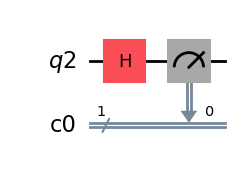

In [ ]:
# Creamos el circuito pasandole los registros
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit_H = QuantumCircuit(qr, cr)

# Añadimos la puerta X al primer (y único) qúbit
circuit_H.h(0)

# Añadimos el medidor
circuit_H.measure(qr, cr)

# Podemos dibujarlo como figura de matplolib
display(circuit_H.draw(output='mpl', style="iqp"))

### Inicializamos la cuenta

Dado que Qiskit Runtime `Sampler` es un servicio gestionado, primero debe inicializar su cuenta. A continuación, puede seleccionar el simulador o el sistema real que desea utilizar para calcular el valor esperado

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
#MY_API_TOKEN="..."
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token='...',
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=5)

Veamos el backend (ordenador) escogido:

In [ ]:
print(backend)

<IBMBackend('ibm_brisbane')>


### Preparamos el circuito

Vamos a mandar a ejecutar en hardware real el circuito de la puerta H.

Para ello, primero tenemos que generarl el ISA circuit

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit_H = pm.run(circuit_H)

### Inicializamos el Qiskit Runtime Sampler

Al inicializar el `Sampler`, utilice el parámetro `mode` para especificar el modo en el que desea que se ejecute.

In [ ]:
#from qiskit_ibm_runtime import Sampler
#sampler = Sampler(backend=backend)

#Para versiones modernas de Qiskit
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)

### Invocamos el sampler y obtenemos los resultados

In [ ]:
job = sampler.run([isa_circuit_H])
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: cwk331m31we000889tfg
>>> Job Status: QUEUED


Podemos monitorizar desde el notebook en que estado está nuestro trabajo.

Otra obción es hacerlo desde la web de los servicios cuánticos de IBM: **[https://quantum-computing.ibm.com/jobs](https://quantum-computing.ibm.com/jobs)**

La celda siguiente podemos correrla tantas veces como queramos para ver como está nuestro trabajo.

In [ ]:
job.status()

'QUEUED'

In [ ]:
import time
time.sleep(30)

In [ ]:
job.status()

'DONE'

In [ ]:
print(job.status())

DONE


También podemos usar el job_monitor, que se actualiza solo sin tener que ejecutar varias veces la celda.

In [ ]:
#job_monitor(job, interval = 10, line_discipline = '\n')

In [ ]:
result_IBM = job.result()
print(f">>> {result_IBM}\n")
try:
    print(f"  > Quasi-probability distribution: {result_IBM.quasi_dists[0]}\n")
    print(f"  > Metadata: {result_IBM.metadata[0]}\n")
except:
    pass

>>> PrimitiveResult([SamplerPubResult(data=DataBin(c0=BitArray(<shape=(), num_shots=4096, num_bits=1>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-11-02 14:42:59', stop='2024-11-02 14:43:19', size=4096>)])}, 'version': 2})



<a id='sec_Notebooks_Circ_1_qubit_2.1'></a>
### Recuperar resultados de trabajos anteriores con el job id

Es importante guardar el Job Id, pues con el podemos recuperar los resultados de un trabajo anterior. Por ejemplo, lo que podemos hacer es ejecutar un circuito y si vemos usando `job.status()` que tarda mucho en entrar en ejecución, podemos anotarnos el id y otro ver los resultado, sin tener que dejar el Notebook abierto.

In [ ]:
# Utilizar el job anterior o poner uno existente
# Ver: https://quantum.ibm.com/workloads para la lista de jobs

#job_id="cwk331m31we000889tfg"
job_id = job.job_id()
print(f"job id = {job_id}")

job id = cwk331m31we000889tfg


In [ ]:
# Podemos listar todos los jobs
jobs = service.jobs()
display(jobs)
print("---")

# Coger uno en particular
job = service.job(job_id)
display(job)
print("---")

# Métricas de la ejecución
jmet = job.metrics()
display(jmet)
print("---")

# Resultado de la ejecución (de aquí obtenemos el histograma)
job_result = job.result()
display(job_result)
print("---")

[<RuntimeJob('cwk331m31we000889tfg', 'sampler')>]

---


<RuntimeJobV2('cwk331m31we000889tfg', 'sampler')>

---


{'bss': {'seconds': 3},
 'usage': {'quantum_seconds': 3, 'seconds': 3},
 'timestamps': {'created': '2024-11-02T14:04:54.158Z',
  'finished': '2024-11-02T14:43:19.448Z',
  'running': '2024-11-02T14:42:55.448Z'},
 'executions': 4096,
 'num_circuits': 1,
 'num_qubits': [127],
 'circuit_depths': [4],
 'qiskit_version': 'qiskit_ibm_runtime-0.32.0,qiskit-1.2.2*,qiskit_aer-0.15.1*',
 'estimated_start_time': '2024-11-02T14:42:54.376Z',
 'estimated_completion_time': '2024-11-02T14:42:57.376Z',
 'position_in_queue': None,
 'position_in_provider': None}

---


PrimitiveResult([SamplerPubResult(data=DataBin(c0=BitArray(<shape=(), num_shots=4096, num_bits=1>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2024-11-02 14:42:59', stop='2024-11-02 14:43:19', size=4096>)])}, 'version': 2})

---


In [ ]:
# Pinchando en un job particular en https://quantum.ibm.com/workloads
# se muestra un código para obtener los resultados del job

# To get counts for a particular pub result, use
#
# pub_result = job_result[<idx>].data.<classical register>.get_counts()
#
# where <idx> is the index of the pub and <classical register> is the name of the classical register.
# You can use circuit.cregs to find the name of the classical registers.

pub_result = job_result[0].data.c0.get_counts()
display(pub_result)

{'1': 2114, '0': 1982}

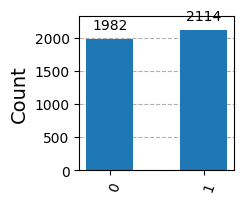

In [ ]:
display(plot_histogram(pub_result, figsize=(2,2)))


### Más sobre el HW cuántico IBM

In [ ]:
# Listar todos los backend públicos disponibles
be = []
backends = service.backends()
for backend in backends:
    print(backend.name)
    be.append(backend)

ibm_brisbane
ibm_kyiv
ibm_sherbrooke


In [ ]:
# Obtener detalles sobre un 'backend' particular (i.e., 'ibmq_manila')

#backend_name = 'ibmq_kyiv'  # Sustituir por el nombre del backend
#backend = service.backend(backend_name)

backend = be[0] # Vamos a coger uno de ellos, el primero

# Backend status
display(backend.status())
display(backend.status().to_dict())
print("--------\n")


# Backend configuration
display(backend.configuration())
#display(backend.configuration().to_dict())
nqubits = backend.configuration().num_qubits
print("# qubits:{0}".format(nqubits))
print("--------\n")

# Backend properties
display(backend.properties())
# display(backend.properties().to_dict())
# Tiempos de decoherencia qubit 0
print("qubit 0, T1={:.6f}".format(backend.properties().t1(0).real))
print("qubit 0, T2={:.6f}".format(backend.properties().t2(0).real))
print("--------\n")


{'backend_name': 'ibm_brisbane',
 'backend_version': '',
 'operational': True,
 'pending_jobs': 28,
 'status_msg': 'active'}

--------



# qubits:127
--------



qubit 0, T1=0.000174
qubit 0, T2=0.000056
--------



In [ ]:
# prompt: Busca infomación sobre los parámetros de decoherencia T1, y T2:
# ¿qué significan?
# ¿de qué manera empírica se podrían obtener?

# T1 and T2 decoherence parameters in quantum computing

# What do T1 and T2 mean?

# T1 (energy relaxation time):  Represents the time it takes for a qubit in an excited state (|1⟩) to decay to its ground state (|0⟩) due to energy dissipation to the environment.  A longer T1 indicates a qubit's state is less susceptible to energy relaxation.

# T2 (phase relaxation time or dephasing time): Represents the time it takes for the superposition state of a qubit to lose its coherence (phase relationship between |0⟩ and |1⟩). Dephasing happens when the qubit's environment influences its phase, causing the superposition state to lose its distinct quantum properties. T2 is usually shorter than or equal to T1, as both energy relaxation and dephasing contribute to overall coherence loss.

# How to obtain T1 and T2 empirically?

# Standard techniques involve Ramsey experiments and inversion recovery experiments. These techniques use specific pulse sequences applied to the qubit:

# 1. Ramsey Experiment (for T2 measurement):
#  - Prepare the qubit in a superposition state (e.g., using a Hadamard gate).
#  - Apply a short delay (variable).
#  - Apply a second pulse (pi/2 rotation) to measure along the x or y axes.
#  - Measure the qubit's state repeatedly for multiple delay times.
#  - The measured probability of observing the qubit in a particular state will oscillate with the delay time. The decay of these oscillations gives information about T2.

# 2. Inversion Recovery Experiment (for T1 measurement):
#  - Prepare the qubit in its ground state (|0⟩).
#  - Apply a pi-pulse (180-degree rotation) to invert the state to |1⟩.
#  - Apply a variable delay time.
#  - Measure the probability of observing the qubit in state |1⟩.
#  - The measured probability will recover exponentially to 1 from 0 with the delay time, and the recovery time constant directly related to T1.

# Qiskit and IBM Quantum:
#
# The provided code snippet already demonstrates how to obtain T1 and T2 values from the IBM Quantum backend:
#
# ```python
# # ... (previous code)
#
# backend = be[0]  # Assuming 'be' is a list of backends.
# print("qubit 0, T1={:.6f}".format(backend.properties().t1(0).real))
# print("qubit 0, T2={:.6f}".format(backend.properties().t2(0).real))
#
# # ... (rest of the code)
# ```

# The `backend.properties()` object contains the measured T1 and T2 times for each qubit.

# Key takeaway:  These times are crucial for understanding the coherence properties of the qubits and for designing quantum algorithms and error mitigation strategies.  The shorter these times, the more difficult it is to perform computations with high fidelity.

In [ ]:
# prompt: Obtén alguna(s) medida(s) de las tasas de error que se proporcionan (por ejemplo de lectura de un qubit, o de alguna puerta). Para ello investiga la lista de propiedades proporcionada por el método backend.properties().

# Accessing and displaying readout error rates
for i in range(nqubits):
  print(f"Qubit {i}: Readout error rate = {backend.properties().readout_error(i)}")

Qubit 0: Readout error rate = 0.024899999999999922
Qubit 1: Readout error rate = 0.04259999999999997
Qubit 2: Readout error rate = 0.009100000000000108
Qubit 3: Readout error rate = 0.031400000000000095
Qubit 4: Readout error rate = 0.014399999999999968
Qubit 5: Readout error rate = 0.00550000000000006
Qubit 6: Readout error rate = 0.012699999999999934
Qubit 7: Readout error rate = 0.021100000000000008
Qubit 8: Readout error rate = 0.006399999999999961
Qubit 9: Readout error rate = 0.008000000000000007
Qubit 10: Readout error rate = 0.01639999999999997
Qubit 11: Readout error rate = 0.13949999999999996
Qubit 12: Readout error rate = 0.016599999999999948
Qubit 13: Readout error rate = 0.012299999999999978
Qubit 14: Readout error rate = 0.015700000000000047
Qubit 15: Readout error rate = 0.017400000000000082
Qubit 16: Readout error rate = 0.020100000000000007
Qubit 17: Readout error rate = 0.011400000000000077
Qubit 18: Readout error rate = 0.09850000000000003
Qubit 19: Readout error rat

<div style="background-color:#c8e6c9">
<hr>
<b>Ejercicio:</b>
    
<b> <!-- font size="+1"><span style="color:red">[OPCIONAL, PARA OPTAR A NOTA] </span></font --></b>
- Busca infomación sobre los parámetros de decoherencia T1, y T2:  
  - ¿qué significan?
  - ¿de qué manera empírica se podrían obtener?
  

- Obtén alguna(s) medida(s) de las tasas de error que se proporcionan (por ejemplo de lectura de un qubit, o de alguna puerta). Para ello investiga la lista de propiedades proporcionada por el método <tt>backend.properties()</tt>.

<hr>
</div>